### 1. Using trained weights, run model on a video

In [6]:
from ultralytics import YOLO
from cursor_tracker.run import *

model = YOLO("weights/cursor_class_best.pt") # get weights from weights folder
video_path = "data/videos/Youtube_section2.mp4"
detections = generate_results(model, video_path)

Detections saved to results/Youtube_section2_max_detection.json


In [1]:
from cursor_tracker.visualise_results import *
time_coord_raw = get_time_coord_raw('results/Youtube_section2_max_detection.json')
time_coord_data = post_process_data(time_coord_raw, height = 1280) 
# height of processed video is 1280 if unspecified in the parameters of generate_results

#### use functions from cursor_tracker.visualise_results 
- plot_2D
- plot_3D
- plot_3D_animation

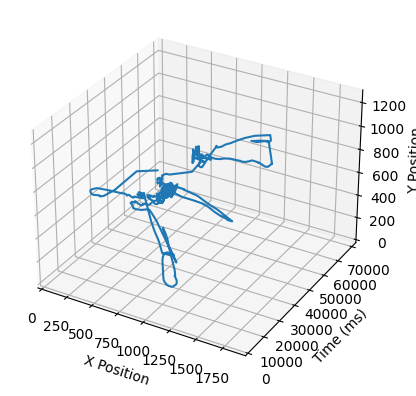

In [4]:
from cursor_tracker.visualise_results import *
#plot_2D(time_coord_data)
#plot_3D(time_coord_data)
plot_3D_animation(time_coord_data, height=1280, width=1920, path='results/Youtube_section2_cursor_3D.gif')

### 2. Analyse motion of cursor detections

In [12]:
from motion_analysis.helper import *

# adjust hyperparameters here, or comment out to use default
factor = 32
loop_ms = 500 
stationary_ms = 1500
underline_ms = 1000 

# get all_info in list of dictionaries
all_info = analyse_motion(time_coord_data, factor,
                          loop_duration=loop_ms, 
                          stationary_duration=stationary_ms, 
                          underline_duration=underline_ms)

all_info[:3] # to visualise first three results

[{'start_time': 21880,
  'end_time': 23216,
  'type': 'loop',
  'start_pos': (788.95, 735.27),
  'end_pos': (820.81, 678.59),
  'bounding_box': {'min_x': 770.63,
   'max_x': 822.75,
   'min_y': 657.3,
   'max_y': 735.27},
  'center': (26.0, 38.0)},
 {'start_time': 24819,
  'end_time': 26222,
  'type': 'loop',
  'start_pos': (788.25, 673.19),
  'end_pos': (784.33, 678.45),
  'bounding_box': {'min_x': 784.33,
   'max_x': 820.76,
   'min_y': 670.63,
   'max_y': 694.19},
  'center': (18.0, 11.0)},
 {'start_time': 17437,
  'end_time': 19808,
  'type': 'stationary',
  'pos': (760.0, 673.0)}]

#### Use functions from motion_analysis.visualise_result_series
- overlay_points_on_frame
- get_loop_bounding_box

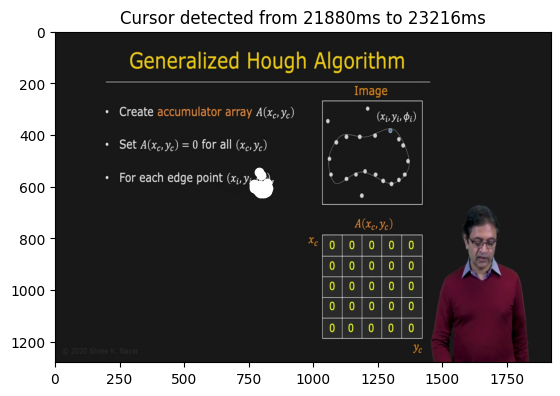

In [13]:
## Code to capture one specific moment
from motion_analysis.visualise_result_series import *
start_time, end_time = 21880, 23216
overlay_points_on_frame(video_path, start_time, end_time, time_coord_data, pre_processed = True)

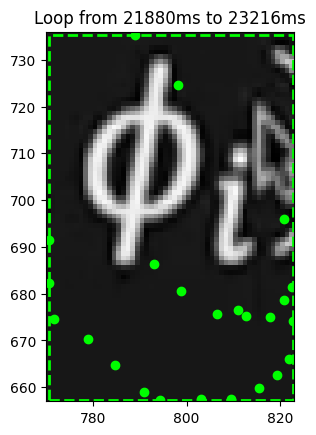

In [14]:
loop_info = all_info[0] # assuming a loop detection does exist
get_loop_bounding_box(loop_info, time_coord_data, video_path)